In [32]:
from pandas import read_csv
from matplotlib import pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np
import math
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',FutureWarning)
from tqdm import tqdm_notebook as tqdm
import scipy.io
import os
import pandas as pd
from sklearn.model_selection import train_test_split
import collections


In [33]:
#autoregression functions
def difference(DiffData):
    d = list()
    for i in range(1, len(DiffData)):
        value = DiffData[i] - DiffData[i - 1]
        d.append(value)
    return np.array(d)
def predict(coeff, hist):
    ypred = 0.0
    for i in range(1, len(coeff)+1):
        ypred += coeff[i-1] * hist[-i]
    return ypred

In [34]:
#get cgm data
data = read_csv('CGMProcessed.csv', header=0, index_col=0)
data.drop(['dateNumber'],axis=1,inplace=True)
X = data.values

In [35]:
#split into train and test
X= data.values
split = int(len(X) - (len(X)*0.2))
X_test = X[split:]
X_train = X[:split]
history = []
for x in X_train:
    history.append(x)
prediction = []
meals = []
prediction.append(history[-2])
prediction.append(history[-1])
print(prediction)

print(len(X_test))
print(len(X_train))    

[array([102.]), array([107.])]
10235
40940


In [36]:
#run SARIMA model for meal detection
d= []
i=0
for t in tqdm(range(len(X_test))):
    i=i+1
    model = ARIMA(history, order=(0,1,0))
    model_fit = model.fit()
    ar_coef = model_fit.arparams
    resid = model_fit.resid
    d = difference(history)
    ypred = history[-1] + predict(ar_coef, d) 
    prediction.append(ypred)
    observation = X_test[t]
    history.append(observation)
    if prediction[-2] > prediction[-3] and prediction[-2] > prediction[-1] and prediction[-2] > 125:
        meals.append(t + 1)
        print(i, "meal")
    print(i, "no meal")
print(prediction)

  0%|          | 0/10235 [00:00<?, ?it/s]

1 no meal
2 no meal
3 no meal
4 no meal
5 no meal
6 no meal
7 no meal
8 no meal
9 no meal
10 no meal
11 no meal
12 no meal
13 no meal
14 no meal
15 no meal
16 no meal
17 no meal
18 no meal
19 no meal
20 no meal
21 no meal
22 no meal
23 no meal
24 no meal
25 no meal
26 no meal
27 no meal
28 no meal
29 no meal
30 no meal
31 no meal
32 no meal
33 no meal
34 no meal
35 no meal
36 no meal
37 no meal
38 no meal
39 no meal
40 no meal
41 no meal
42 no meal
43 no meal
44 no meal
45 no meal
46 no meal
47 no meal
48 meal
48 no meal
49 no meal
50 no meal
51 no meal
52 no meal
53 no meal
54 no meal
55 no meal
56 no meal
57 no meal
58 no meal
59 no meal
60 no meal
61 no meal
62 no meal
63 no meal
64 no meal
65 no meal
66 no meal
67 no meal
68 no meal
69 no meal
70 no meal
71 no meal
72 no meal
73 no meal
74 no meal
75 no meal
76 meal
76 no meal
77 no meal
78 no meal
79 no meal
80 no meal
81 no meal
82 no meal
83 no meal
84 meal
84 no meal
85 no meal
86 no meal
87 no meal
88 no meal
89 no meal
90 no 

686 no meal
687 no meal
688 no meal
689 no meal
690 meal
690 no meal
691 no meal
692 no meal
693 no meal
694 no meal
695 no meal
696 no meal
697 no meal
698 no meal
699 no meal
700 no meal
701 meal
701 no meal
702 no meal
703 no meal
704 no meal
705 no meal
706 no meal
707 no meal
708 no meal
709 no meal
710 no meal
711 no meal
712 no meal
713 no meal
714 no meal
715 no meal
716 meal
716 no meal
717 no meal
718 no meal
719 no meal
720 no meal
721 meal
721 no meal
722 no meal
723 no meal
724 no meal
725 no meal
726 no meal
727 no meal
728 no meal
729 no meal
730 no meal
731 no meal
732 no meal
733 no meal
734 no meal
735 no meal
736 no meal
737 no meal
738 no meal
739 no meal
740 no meal
741 no meal
742 no meal
743 no meal
744 no meal
745 no meal
746 no meal
747 no meal
748 no meal
749 no meal
750 no meal
751 no meal
752 no meal
753 no meal
754 no meal
755 no meal
756 no meal
757 no meal
758 no meal
759 no meal
760 no meal
761 no meal
762 no meal
763 no meal
764 no meal
765 no meal
766 

1307 no meal
1308 no meal
1309 no meal
1310 no meal
1311 no meal
1312 no meal
1313 no meal
1314 no meal
1315 no meal
1316 no meal
1317 no meal
1318 no meal
1319 no meal
1320 no meal
1321 no meal
1322 no meal
1323 no meal
1324 no meal
1325 no meal
1326 meal
1326 no meal
1327 no meal
1328 no meal
1329 no meal
1330 no meal
1331 no meal
1332 meal
1332 no meal
1333 no meal
1334 no meal
1335 no meal
1336 no meal
1337 no meal
1338 no meal
1339 no meal
1340 no meal
1341 no meal
1342 no meal
1343 no meal
1344 no meal
1345 no meal
1346 no meal
1347 no meal
1348 no meal
1349 no meal
1350 no meal
1351 no meal
1352 no meal
1353 no meal
1354 no meal
1355 no meal
1356 no meal
1357 no meal
1358 no meal
1359 no meal
1360 no meal
1361 no meal
1362 no meal
1363 no meal
1364 no meal
1365 no meal
1366 no meal
1367 no meal
1368 no meal
1369 no meal
1370 no meal
1371 no meal
1372 no meal
1373 no meal
1374 no meal
1375 no meal
1376 no meal
1377 no meal
1378 no meal
1379 no meal
1380 no meal
1381 meal
1381 no 

1920 no meal
1921 no meal
1922 no meal
1923 no meal
1924 no meal
1925 no meal
1926 no meal
1927 no meal
1928 no meal
1929 no meal
1930 no meal
1931 no meal
1932 no meal
1933 no meal
1934 no meal
1935 no meal
1936 no meal
1937 no meal
1938 no meal
1939 no meal
1940 no meal
1941 no meal
1942 no meal
1943 no meal
1944 no meal
1945 no meal
1946 no meal
1947 no meal
1948 no meal
1949 no meal
1950 no meal
1951 no meal
1952 no meal
1953 no meal
1954 no meal
1955 no meal
1956 no meal
1957 meal
1957 no meal
1958 no meal
1959 no meal
1960 no meal
1961 no meal
1962 no meal
1963 no meal
1964 no meal
1965 no meal
1966 no meal
1967 no meal
1968 no meal
1969 no meal
1970 no meal
1971 meal
1971 no meal
1972 no meal
1973 no meal
1974 no meal
1975 no meal
1976 no meal
1977 no meal
1978 no meal
1979 no meal
1980 no meal
1981 no meal
1982 no meal
1983 no meal
1984 no meal
1985 no meal
1986 no meal
1987 no meal
1988 no meal
1989 no meal
1990 no meal
1991 no meal
1992 no meal
1993 no meal
1994 no meal
1995 

2537 no meal
2538 no meal
2539 no meal
2540 no meal
2541 no meal
2542 no meal
2543 no meal
2544 no meal
2545 no meal
2546 no meal
2547 no meal
2548 no meal
2549 no meal
2550 no meal
2551 no meal
2552 no meal
2553 no meal
2554 no meal
2555 no meal
2556 no meal
2557 meal
2557 no meal
2558 no meal
2559 no meal
2560 no meal
2561 no meal
2562 no meal
2563 no meal
2564 no meal
2565 no meal
2566 no meal
2567 no meal
2568 no meal
2569 no meal
2570 no meal
2571 no meal
2572 no meal
2573 meal
2573 no meal
2574 no meal
2575 no meal
2576 no meal
2577 no meal
2578 no meal
2579 no meal
2580 no meal
2581 no meal
2582 no meal
2583 no meal
2584 no meal
2585 no meal
2586 no meal
2587 no meal
2588 no meal
2589 no meal
2590 no meal
2591 no meal
2592 no meal
2593 no meal
2594 no meal
2595 no meal
2596 no meal
2597 no meal
2598 no meal
2599 no meal
2600 no meal
2601 meal
2601 no meal
2602 no meal
2603 no meal
2604 no meal
2605 no meal
2606 no meal
2607 no meal
2608 no meal
2609 no meal
2610 no meal
2611 no 

3143 no meal
3144 no meal
3145 no meal
3146 no meal
3147 no meal
3148 no meal
3149 no meal
3150 no meal
3151 no meal
3152 no meal
3153 no meal
3154 no meal
3155 no meal
3156 no meal
3157 no meal
3158 no meal
3159 no meal
3160 no meal
3161 no meal
3162 meal
3162 no meal
3163 no meal
3164 no meal
3165 no meal
3166 no meal
3167 meal
3167 no meal
3168 no meal
3169 no meal
3170 no meal
3171 no meal
3172 no meal
3173 no meal
3174 no meal
3175 no meal
3176 no meal
3177 no meal
3178 no meal
3179 no meal
3180 no meal
3181 no meal
3182 no meal
3183 no meal
3184 no meal
3185 no meal
3186 no meal
3187 meal
3187 no meal
3188 no meal
3189 no meal
3190 no meal
3191 no meal
3192 no meal
3193 no meal
3194 no meal
3195 no meal
3196 no meal
3197 no meal
3198 no meal
3199 no meal
3200 no meal
3201 no meal
3202 no meal
3203 no meal
3204 no meal
3205 meal
3205 no meal
3206 no meal
3207 no meal
3208 no meal
3209 no meal
3210 no meal
3211 no meal
3212 no meal
3213 meal
3213 no meal
3214 no meal
3215 no meal
3

3755 no meal
3756 no meal
3757 no meal
3758 no meal
3759 no meal
3760 meal
3760 no meal
3761 no meal
3762 no meal
3763 no meal
3764 no meal
3765 no meal
3766 no meal
3767 no meal
3768 meal
3768 no meal
3769 no meal
3770 no meal
3771 no meal
3772 no meal
3773 no meal
3774 no meal
3775 no meal
3776 no meal
3777 no meal
3778 no meal
3779 no meal
3780 no meal
3781 no meal
3782 no meal
3783 no meal
3784 no meal
3785 meal
3785 no meal
3786 no meal
3787 no meal
3788 no meal
3789 no meal
3790 no meal
3791 no meal
3792 meal
3792 no meal
3793 no meal
3794 no meal
3795 no meal
3796 no meal
3797 no meal
3798 no meal
3799 no meal
3800 meal
3800 no meal
3801 no meal
3802 no meal
3803 no meal
3804 no meal
3805 no meal
3806 no meal
3807 no meal
3808 no meal
3809 no meal
3810 no meal
3811 no meal
3812 no meal
3813 no meal
3814 no meal
3815 no meal
3816 no meal
3817 no meal
3818 no meal
3819 no meal
3820 no meal
3821 no meal
3822 no meal
3823 no meal
3824 no meal
3825 no meal
3826 meal
3826 no meal
3827

4364 no meal
4365 meal
4365 no meal
4366 no meal
4367 no meal
4368 no meal
4369 no meal
4370 no meal
4371 no meal
4372 no meal
4373 meal
4373 no meal
4374 no meal
4375 no meal
4376 no meal
4377 no meal
4378 no meal
4379 no meal
4380 no meal
4381 no meal
4382 no meal
4383 no meal
4384 no meal
4385 no meal
4386 no meal
4387 no meal
4388 no meal
4389 no meal
4390 no meal
4391 no meal
4392 no meal
4393 no meal
4394 no meal
4395 no meal
4396 no meal
4397 no meal
4398 no meal
4399 no meal
4400 no meal
4401 no meal
4402 meal
4402 no meal
4403 no meal
4404 no meal
4405 no meal
4406 no meal
4407 no meal
4408 no meal
4409 no meal
4410 no meal
4411 no meal
4412 no meal
4413 meal
4413 no meal
4414 no meal
4415 no meal
4416 no meal
4417 meal
4417 no meal
4418 no meal
4419 no meal
4420 no meal
4421 no meal
4422 no meal
4423 no meal
4424 no meal
4425 no meal
4426 no meal
4427 no meal
4428 no meal
4429 meal
4429 no meal
4430 no meal
4431 no meal
4432 no meal
4433 no meal
4434 no meal
4435 no meal
4436

4967 no meal
4968 no meal
4969 no meal
4970 no meal
4971 no meal
4972 no meal
4973 no meal
4974 meal
4974 no meal
4975 no meal
4976 no meal
4977 no meal
4978 no meal
4979 no meal
4980 no meal
4981 no meal
4982 no meal
4983 no meal
4984 meal
4984 no meal
4985 no meal
4986 no meal
4987 no meal
4988 no meal
4989 no meal
4990 no meal
4991 no meal
4992 no meal
4993 no meal
4994 no meal
4995 no meal
4996 meal
4996 no meal
4997 no meal
4998 no meal
4999 no meal
5000 no meal
5001 no meal
5002 no meal
5003 meal
5003 no meal
5004 no meal
5005 no meal
5006 no meal
5007 no meal
5008 meal
5008 no meal
5009 no meal
5010 no meal
5011 no meal
5012 no meal
5013 no meal
5014 no meal
5015 no meal
5016 no meal
5017 meal
5017 no meal
5018 no meal
5019 no meal
5020 no meal
5021 no meal
5022 no meal
5023 no meal
5024 no meal
5025 no meal
5026 no meal
5027 no meal
5028 no meal
5029 no meal
5030 no meal
5031 no meal
5032 meal
5032 no meal
5033 no meal
5034 no meal
5035 no meal
5036 no meal
5037 no meal
5038 no

5574 no meal
5575 no meal
5576 no meal
5577 no meal
5578 no meal
5579 no meal
5580 no meal
5581 no meal
5582 no meal
5583 no meal
5584 no meal
5585 no meal
5586 no meal
5587 no meal
5588 no meal
5589 meal
5589 no meal
5590 no meal
5591 no meal
5592 no meal
5593 no meal
5594 no meal
5595 no meal
5596 no meal
5597 no meal
5598 no meal
5599 no meal
5600 no meal
5601 no meal
5602 no meal
5603 no meal
5604 no meal
5605 no meal
5606 no meal
5607 no meal
5608 no meal
5609 no meal
5610 no meal
5611 no meal
5612 no meal
5613 no meal
5614 no meal
5615 no meal
5616 no meal
5617 no meal
5618 no meal
5619 no meal
5620 no meal
5621 no meal
5622 no meal
5623 no meal
5624 no meal
5625 no meal
5626 no meal
5627 no meal
5628 no meal
5629 no meal
5630 no meal
5631 no meal
5632 no meal
5633 no meal
5634 no meal
5635 no meal
5636 no meal
5637 no meal
5638 no meal
5639 no meal
5640 no meal
5641 no meal
5642 no meal
5643 no meal
5644 no meal
5645 no meal
5646 no meal
5647 no meal
5648 no meal
5649 no meal
56

6180 no meal
6181 no meal
6182 no meal
6183 no meal
6184 no meal
6185 no meal
6186 no meal
6187 no meal
6188 no meal
6189 no meal
6190 no meal
6191 no meal
6192 no meal
6193 no meal
6194 no meal
6195 no meal
6196 no meal
6197 no meal
6198 no meal
6199 no meal
6200 no meal
6201 no meal
6202 no meal
6203 no meal
6204 no meal
6205 no meal
6206 no meal
6207 no meal
6208 no meal
6209 no meal
6210 no meal
6211 no meal
6212 no meal
6213 no meal
6214 no meal
6215 no meal
6216 no meal
6217 no meal
6218 no meal
6219 no meal
6220 no meal
6221 no meal
6222 no meal
6223 no meal
6224 no meal
6225 no meal
6226 no meal
6227 no meal
6228 no meal
6229 no meal
6230 no meal
6231 no meal
6232 no meal
6233 no meal
6234 no meal
6235 no meal
6236 meal
6236 no meal
6237 no meal
6238 no meal
6239 no meal
6240 no meal
6241 no meal
6242 no meal
6243 no meal
6244 no meal
6245 no meal
6246 no meal
6247 no meal
6248 no meal
6249 no meal
6250 no meal
6251 no meal
6252 no meal
6253 no meal
6254 no meal
6255 no meal
62

6780 no meal
6781 no meal
6782 no meal
6783 no meal
6784 no meal
6785 no meal
6786 no meal
6787 no meal
6788 no meal
6789 no meal
6790 no meal
6791 no meal
6792 no meal
6793 no meal
6794 no meal
6795 no meal
6796 no meal
6797 no meal
6798 no meal
6799 no meal
6800 no meal
6801 no meal
6802 no meal
6803 no meal
6804 no meal
6805 no meal
6806 no meal
6807 no meal
6808 no meal
6809 no meal
6810 no meal
6811 no meal
6812 no meal
6813 no meal
6814 no meal
6815 no meal
6816 no meal
6817 meal
6817 no meal
6818 no meal
6819 no meal
6820 no meal
6821 no meal
6822 no meal
6823 no meal
6824 no meal
6825 no meal
6826 no meal
6827 no meal
6828 no meal
6829 no meal
6830 meal
6830 no meal
6831 no meal
6832 no meal
6833 no meal
6834 no meal
6835 no meal
6836 no meal
6837 no meal
6838 no meal
6839 no meal
6840 no meal
6841 no meal
6842 no meal
6843 no meal
6844 no meal
6845 meal
6845 no meal
6846 no meal
6847 no meal
6848 no meal
6849 no meal
6850 no meal
6851 no meal
6852 no meal
6853 no meal
6854 no 

7384 no meal
7385 no meal
7386 no meal
7387 no meal
7388 no meal
7389 no meal
7390 no meal
7391 no meal
7392 meal
7392 no meal
7393 no meal
7394 no meal
7395 no meal
7396 no meal
7397 no meal
7398 no meal
7399 no meal
7400 no meal
7401 no meal
7402 no meal
7403 no meal
7404 no meal
7405 no meal
7406 no meal
7407 no meal
7408 no meal
7409 no meal
7410 no meal
7411 no meal
7412 no meal
7413 no meal
7414 no meal
7415 no meal
7416 no meal
7417 no meal
7418 no meal
7419 no meal
7420 no meal
7421 no meal
7422 no meal
7423 no meal
7424 no meal
7425 no meal
7426 no meal
7427 no meal
7428 no meal
7429 no meal
7430 no meal
7431 no meal
7432 no meal
7433 no meal
7434 no meal
7435 no meal
7436 no meal
7437 no meal
7438 no meal
7439 no meal
7440 meal
7440 no meal
7441 no meal
7442 no meal
7443 no meal
7444 meal
7444 no meal
7445 no meal
7446 no meal
7447 no meal
7448 no meal
7449 no meal
7450 no meal
7451 no meal
7452 no meal
7453 no meal
7454 no meal
7455 no meal
7456 no meal
7457 no meal
7458 mea

7986 no meal
7987 no meal
7988 no meal
7989 no meal
7990 no meal
7991 no meal
7992 no meal
7993 no meal
7994 no meal
7995 no meal
7996 no meal
7997 no meal
7998 no meal
7999 no meal
8000 no meal
8001 no meal
8002 no meal
8003 no meal
8004 no meal
8005 no meal
8006 meal
8006 no meal
8007 no meal
8008 no meal
8009 no meal
8010 no meal
8011 no meal
8012 meal
8012 no meal
8013 no meal
8014 no meal
8015 no meal
8016 no meal
8017 no meal
8018 no meal
8019 no meal
8020 no meal
8021 no meal
8022 no meal
8023 no meal
8024 no meal
8025 no meal
8026 no meal
8027 no meal
8028 no meal
8029 no meal
8030 no meal
8031 no meal
8032 no meal
8033 no meal
8034 no meal
8035 no meal
8036 no meal
8037 no meal
8038 no meal
8039 no meal
8040 no meal
8041 no meal
8042 no meal
8043 no meal
8044 no meal
8045 meal
8045 no meal
8046 no meal
8047 no meal
8048 no meal
8049 no meal
8050 no meal
8051 no meal
8052 no meal
8053 meal
8053 no meal
8054 no meal
8055 no meal
8056 no meal
8057 no meal
8058 no meal
8059 no mea

8586 no meal
8587 no meal
8588 meal
8588 no meal
8589 no meal
8590 no meal
8591 no meal
8592 no meal
8593 no meal
8594 no meal
8595 no meal
8596 no meal
8597 no meal
8598 no meal
8599 no meal
8600 no meal
8601 no meal
8602 no meal
8603 no meal
8604 no meal
8605 no meal
8606 no meal
8607 no meal
8608 meal
8608 no meal
8609 no meal
8610 no meal
8611 no meal
8612 no meal
8613 meal
8613 no meal
8614 no meal
8615 meal
8615 no meal
8616 no meal
8617 no meal
8618 no meal
8619 no meal
8620 no meal
8621 no meal
8622 no meal
8623 no meal
8624 no meal
8625 no meal
8626 no meal
8627 no meal
8628 no meal
8629 no meal
8630 no meal
8631 no meal
8632 no meal
8633 no meal
8634 no meal
8635 no meal
8636 no meal
8637 no meal
8638 no meal
8639 no meal
8640 no meal
8641 no meal
8642 no meal
8643 no meal
8644 no meal
8645 no meal
8646 no meal
8647 no meal
8648 no meal
8649 no meal
8650 no meal
8651 no meal
8652 no meal
8653 no meal
8654 no meal
8655 no meal
8656 no meal
8657 no meal
8658 no meal
8659 meal
8

9191 no meal
9192 no meal
9193 no meal
9194 no meal
9195 no meal
9196 no meal
9197 no meal
9198 no meal
9199 meal
9199 no meal
9200 no meal
9201 no meal
9202 no meal
9203 no meal
9204 no meal
9205 no meal
9206 no meal
9207 no meal
9208 no meal
9209 no meal
9210 meal
9210 no meal
9211 no meal
9212 no meal
9213 no meal
9214 no meal
9215 no meal
9216 no meal
9217 no meal
9218 no meal
9219 no meal
9220 no meal
9221 no meal
9222 no meal
9223 no meal
9224 no meal
9225 no meal
9226 no meal
9227 no meal
9228 no meal
9229 no meal
9230 no meal
9231 no meal
9232 no meal
9233 no meal
9234 no meal
9235 no meal
9236 no meal
9237 no meal
9238 no meal
9239 no meal
9240 no meal
9241 no meal
9242 no meal
9243 no meal
9244 no meal
9245 no meal
9246 no meal
9247 meal
9247 no meal
9248 no meal
9249 no meal
9250 no meal
9251 no meal
9252 no meal
9253 meal
9253 no meal
9254 no meal
9255 meal
9255 no meal
9256 no meal
9257 no meal
9258 no meal
9259 no meal
9260 no meal
9261 no meal
9262 no meal
9263 no meal
9

9795 no meal
9796 no meal
9797 no meal
9798 no meal
9799 no meal
9800 no meal
9801 meal
9801 no meal
9802 no meal
9803 no meal
9804 no meal
9805 no meal
9806 no meal
9807 no meal
9808 no meal
9809 no meal
9810 no meal
9811 no meal
9812 no meal
9813 meal
9813 no meal
9814 no meal
9815 no meal
9816 no meal
9817 no meal
9818 no meal
9819 no meal
9820 no meal
9821 no meal
9822 no meal
9823 meal
9823 no meal
9824 no meal
9825 no meal
9826 no meal
9827 no meal
9828 no meal
9829 no meal
9830 no meal
9831 no meal
9832 no meal
9833 no meal
9834 no meal
9835 no meal
9836 no meal
9837 no meal
9838 no meal
9839 no meal
9840 no meal
9841 no meal
9842 no meal
9843 no meal
9844 no meal
9845 no meal
9846 no meal
9847 no meal
9848 no meal
9849 no meal
9850 no meal
9851 no meal
9852 no meal
9853 no meal
9854 no meal
9855 no meal
9856 no meal
9857 meal
9857 no meal
9858 no meal
9859 no meal
9860 no meal
9861 no meal
9862 no meal
9863 no meal
9864 no meal
9865 no meal
9866 no meal
9867 no meal
9868 no mea

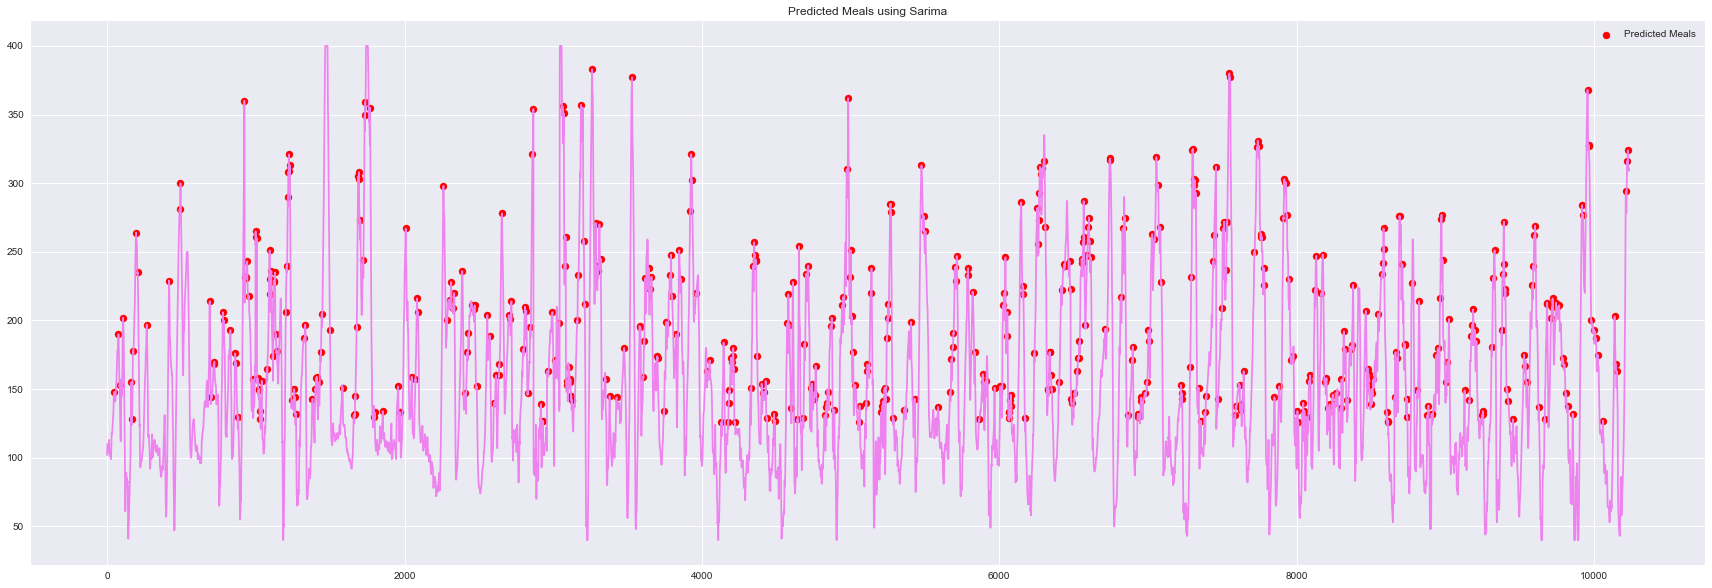

In [37]:
#predicted meals with SARIMA
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(10)
plt.style.use('seaborn')
p = plt.plot(prediction, color="violet")
predicted_meals = []

for i in meals:
    predicted_meals.append(prediction[i])

m = plt.scatter(meals, predicted_meals, s=50, color="red", label="predicted meals")
plt.legend((p,m), ('PredictedVMeal values', 'Predicted Meals'),scatterpoints=1, bbox_to_anchor = (1 , 1))

plt.title("Predicted Meals using Sarima")
plt.show()

In [38]:
#model performance and results

from sklearn import metrics
print(X_test)
print(prediction)

def DifferenceList(D,P):
    errors = []
    sum=0
    for i in range (len(D)):
        e = D[i] - P[i]
        sum = sum + e
        errors.append(e)
    return sum,errors

n = prediction[2:]
X , Y = DifferenceList(X_test,prediction)
print(X)
print(Y)
err = X/len(Y)
print("Errors: ",err)
print("Mean Squared Error :",metrics.mean_squared_error(X_test,n))
print("Mean Absolute Error :",metrics.mean_absolute_error(X_test,n))

[[110.]
 [109.]
 [107.]
 ...
 [309.]
 [310.]
 [314.]]
[array([102.]), array([107.]), array([107.]), array([110.]), array([109.]), array([107.]), array([104.]), array([104.]), array([107.]), array([109.]), array([110.]), array([112.]), array([113.]), array([112.]), array([109.]), array([105.]), array([103.]), array([101.]), array([101.]), array([101.]), array([102.]), array([102.]), array([103.]), array([103.]), array([102.]), array([101.]), array([99.]), array([102.]), array([106.]), array([112.]), array([118.]), array([118.]), array([117.]), array([117.]), array([119.]), array([122.]), array([124.]), array([126.]), array([128.]), array([129.]), array([130.]), array([131.]), array([133.]), array([138.]), array([143.]), array([145.]), array([147.]), array([147.]), array([148.]), array([147.]), array([146.]), array([144.]), array([142.]), array([141.]), array([141.]), array([141.]), array([142.]), array([145.]), array([148.]), array([150.]), array([152.]), array([153.]), array([154.]), a

[array([8.]), array([2.]), array([0.]), array([-6.]), array([-5.]), array([0.]), array([5.]), array([6.]), array([5.]), array([4.]), array([2.]), array([-3.]), array([-8.]), array([-9.]), array([-8.]), array([-4.]), array([-2.]), array([1.]), array([1.]), array([2.]), array([1.]), array([0.]), array([-2.]), array([-4.]), array([0.]), array([5.]), array([13.]), array([16.]), array([12.]), array([5.]), array([-1.]), array([1.]), array([5.]), array([7.]), array([7.]), array([6.]), array([5.]), array([4.]), array([3.]), array([4.]), array([8.]), array([12.]), array([12.]), array([9.]), array([4.]), array([3.]), array([0.]), array([-1.]), array([-4.]), array([-5.]), array([-5.]), array([-3.]), array([-1.]), array([1.]), array([4.]), array([7.]), array([8.]), array([7.]), array([5.]), array([4.]), array([6.]), array([9.]), array([11.]), array([11.]), array([10.]), array([11.]), array([9.]), array([6.]), array([3.]), array([2.]), array([5.]), array([8.]), array([9.]), array([7.]), array([1.])

10237


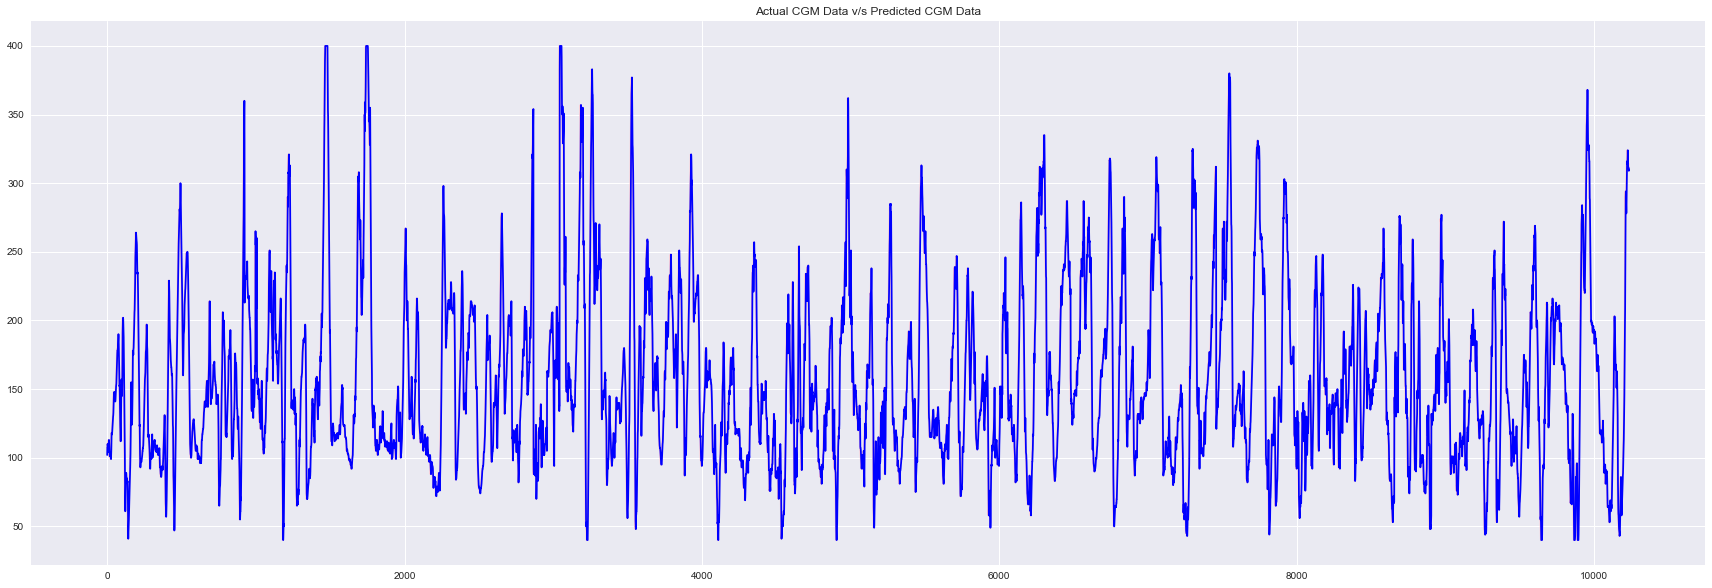

In [39]:
#Predicted vs original data
print(len(prediction))
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(10)
plt.title('Actual CGM Data v/s Predicted CGM Data')
hist_data_plot = plt.plot(history[split:],color = 'pink', label='Actual CGM Data')
predictions_plot = plt.plot(prediction, color = 'blue', label = 'Predicted CGM Data')



In [40]:
#graph similarity

import financialanalysis as fa
new_prediction = []
new_prediction = prediction[2:]
print(len(X_test))
print(len(new_prediction))
RMS = fa.RMSError(X_test, new_prediction)
print("RMS =",RMS)

10235
10235
RMS = 8.183800887801299
